In [1]:
import requests
import os
from sodapy import Socrata
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
socrata_domain = "data.cityofnewyork.us"
s_token= "owhOVQVkxAIoOnckQs4UrHcVo"
client = Socrata(socrata_domain, s_token)
results=client.get("uvbq-3m68",limit=100,where="issue_date like'%/2018'")

In [3]:
results_df=pd.DataFrame.from_records(results)


In [4]:
results_df["payment_amount"]=results_df.payment_amount.apply(pd.to_numeric)
results_df["reduction_amount"]=results_df.reduction_amount.apply(pd.to_numeric)
results_df["amount_due"]=results_df.amount_due.apply(pd.to_numeric)
results_df["fine_amount"]=results_df.fine_amount.apply(pd.to_numeric)
results_df["interest_amount"]=results_df.interest_amount.apply(pd.to_numeric)
results_df["penalty_amount"]=results_df.penalty_amount.apply(pd.to_numeric)

In [5]:
df_precinct=results_df.groupby(["precinct"])["summons_number"].count()
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
amount_due             100 non-null int64
county                 97 non-null object
fine_amount            100 non-null int64
interest_amount        100 non-null float64
issue_date             100 non-null object
issuing_agency         100 non-null object
judgment_entry_date    6 non-null object
license_type           100 non-null object
payment_amount         100 non-null float64
penalty_amount         100 non-null int64
plate                  100 non-null object
precinct               100 non-null object
reduction_amount       100 non-null float64
state                  100 non-null object
summons_image          100 non-null object
summons_number         100 non-null object
violation              100 non-null object
violation_status       34 non-null object
violation_time         100 non-null object
dtypes: float64(3), int64(3), object(13)
memory usage: 14.9+ KB


In [6]:
coord=pd.read_excel("Coord_Precinct.xlsx",converters={"Code":str})
coord=coord.rename(columns={"Code":"precinct"})
coord.tail()

,precinct,Lat,lon
72,115,40.783624,-73.868629
73,120,40.619016,-74.066657
74,121,40.641868,-74.168204
75,122,40.537972,-74.132038
76,123,40.502112,-74.229455


In [7]:
df_Pr=pd.merge(results_df,coord,on="precinct")

In [8]:
dfCount=df_Pr.groupby(["precinct"])["summons_number"].count()


In [9]:
Coordinate=pd.merge(coord,dfCount,on="precinct")

In [10]:
Coordinate

,precinct,Lat,lon,summons_number
0,001,40.704679,-74.017634,2
1,006,40.738552,-73.999684,4
2,009,40.726723,-73.971609,3
3,013,40.743882,-73.981560,1
4,014,40.753367,-73.974648,1
5,017,40.746604,-73.964212,7
6,020,40.785293,-73.969336,7
7,024,40.801156,-73.959647,4
8,025,40.780830,-73.938046,5
9,028,40.807713,-73.941317,2


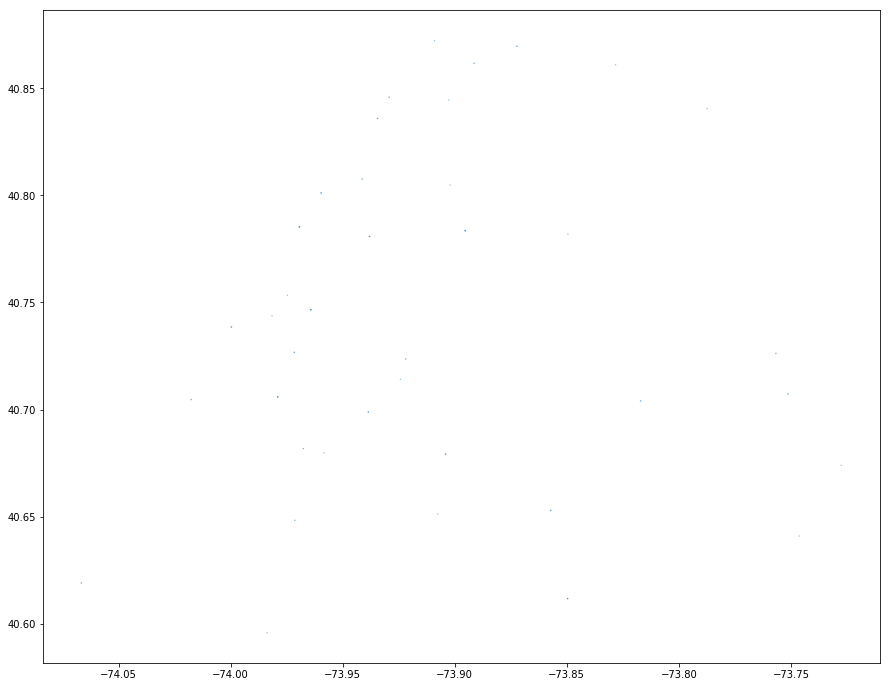

In [11]:
plt.figure(figsize=(15,12))
plt.scatter(x=Coordinate["lon"], y=Coordinate["Lat"], s=Coordinate["summons_number"]*0.09,
            alpha=0.7)

In [12]:
date_list = []
month_list = []
time_list = []
hours_list = []
year_int = 0
month_int = 0
day_int = 0
total_violations = len(results_df)

In [145]:
violation_time_df = results_df["violation_time"]
for time in violation_time_df:
    try:
        if time[-1:] == "A" or int(time[:2]) == 12:
            try:
                hours_int = int(time[:2])
                minutes_int = int(time[3:5])
                issue_time = datetime.time(hours_int, minutes_int)
            except (ValueError):
                print(time)
        elif time[-1:] == "P" and int(time[:2]) != 12:
            try:
                hours_int = int(time[:2]) + 12
                minutes_int = int(time[3:5])
                issue_time = datetime.time(hours_int, minutes_int)
            except (ValueError):
                print(time)
    except (TypeError):
        hours_int = np.NaN
        minutes_int = np.NaN
        issue_time = np.NaN

        
    time_list.append(issue_time)
    hours_list.append(hours_int)
##################################################################
issue_date_df = results_df["issue_date"]
for date in issue_date_df:
    try:
        year_int = int(date[-4:])
        month_int = int(date[:2])
        day_int = int(date[3:5])
        ymd = datetime.datetime(year_int, month_int, day_int)
        date_list.append(ymd)
        month_list.append(month_int)
    except (ValueError):
        year_int = np.NaN
        month_int = np.NaN
        day_int = np.NaN
        ymd = np.NaN
        date_list.append(ymd)
        month_list.append(month_int)    

In [146]:
results_df["Date Issued"] = date_list
results_df["Month Issued"] = month_list
results_df["Time Issued"] = time_list
results_df["Hour Issued"] = hours_list

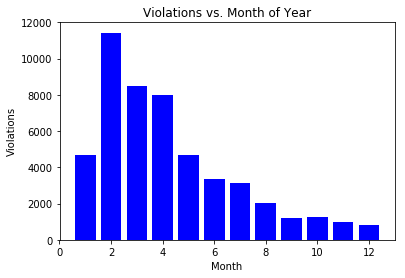

In [147]:
date_grouped_df = results_df.groupby(["Month Issued"]).count()
plt.bar(date_offense_count_df.index, date_offense_count_df["plate"], color="b", align="center")
plt.title("Violations vs. Month of Year")
plt.xlabel("Month")
plt.ylabel("Violations")
plt.savefig("violations_vs_month.png")

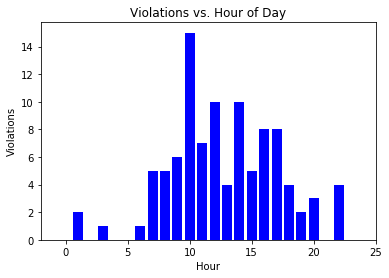

In [148]:
hour_grouped_df = results_df.groupby(["Hour Issued"]).count()
hour_grouped_df.head()
plt.bar(hour_grouped_df.index, hour_grouped_df["plate"], color="b", align="center")
plt.xlim(-2, 25)
plt.title("Violations vs. Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Violations")
plt.savefig("violations_vs_hour.png")

In [151]:
violation_grouped_df = results_df.groupby(["violation"])
violation_count_df = violation_grouped_df.count()

#store total fine $ in variable
fine_sum = violation_grouped_df["fine_amount"].sum()


#reduce dataframe to needed columns
violation_count_reduced = pd.DataFrame(violation_grouped_df["issue_date"])
#violation_count_reduced


,0,1
0,ANGLE PARKING-COMM VEHICLE,"40 01/17/2018 Name: issue_date, dtype: object"
1,BIKE LANE,"75 05/21/2018 Name: issue_date, dtype: object"
2,CROSSWALK,"34 02/17/2018 Name: issue_date, dtype: object"
3,DOUBLE PARKING,31 03/23/2018 33 02/02/2018 42 01/17/...
4,DOUBLE PARKING-MIDTOWN COMML,"91 02/08/2018 Name: issue_date, dtype: object"
5,EXPIRED MUNI METER,4 03/20/2018 11 07/11/2018 22 04/21/...
6,FAIL TO DISP. MUNI METER RECPT,"53 03/09/2018 Name: issue_date, dtype: object"
7,FAIL TO DSPLY MUNI METER RECPT,18 03/20/2018 25 01/24/2018 37 05/03/...
8,FIRE HYDRANT,9 06/05/2018 12 02/16/2018 17 03/20/...
9,FRONT OR BACK PLATE MISSING,7 02/05/2018 99 06/06/2018 Name: issue_...


In [150]:

#reduce dataframe to needed columns
violation_count_reduced = pd.DataFrame(violation_grouped_df["issue_date"])

#rename column to represent total row count which is also total violation count
violation_count_renamed = violation_count_reduced.rename(columns={"issue_date": "Total Count"})

#calculate violation type occurrences as a percentage of total violations
percent_of_violations = (violation_count_renamed["Total Count"]/total_violations)*100

#add percentage of violations in new column
violation_count_renamed["Percent of Total Count"] = percent_of_violations

#add column for total fine
violation_count_renamed["fine_amount"] = fine_sum

#calculate percent of fines
percent_of_fine = round((violation_count_renamed["fine_amount"]/sum(results_df["fine_amount"]))*100,2)
violation_count_renamed["Percent of Fine"] = percent_of_fine


violation_count_sorted = violation_count_renamed.sort_values("Total Count", ascending=False)
violation_count_sorted.head()

KeyError: 'Total Count'